# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
import pandas as pd
import pickle
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.xmeans import xmeans

from t2_constants import *
from t2_utility import *

In [2]:
with open(f'{PICKLE_FOLDER}{CLUST_DF}.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{CLUST_DF}.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [3]:
clustering_df_array, clustering_df = scale_df(clustering_df, 1)
pure_clustering_df_array, pure_clustering_df = scale_df(pure_clustering_df, 1)

In [4]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

In [5]:
u_df

,item_count,item_dist_count,max_items_per_b,shop_entropy,category_entropy,item_entropy,price_entropy,max_item_dist_per_b,total_price,basket_count,category_count,shop_count,avg_items_per_basket,avg_baskets_per_d,natural_average_basket_ranking,natural_average_item_ranking,natural_average_price_ranking
user_id,,,,,,,,,,,,,,,,,
1,709,580,141,2.751283,2.547201,6.347079,3.806662,123,630951.756741,45,48,30,15.755556,1.250000,4.613223,2.662810,2.325620
2,903,669,158,2.951922,2.499756,6.482616,4.168650,104,723773.163169,66,45,31,13.681818,1.404255,4.560455,2.315789,2.517781
3,397,320,50,2.893171,2.558895,5.753452,3.688879,43,488038.085519,40,41,27,9.925000,1.290323,3.990964,1.207831,3.054217
4,932,680,214,2.456911,2.490232,6.485680,3.891820,157,778783.061807,49,41,28,19.020408,1.400000,4.787962,2.785226,2.500684
5,824,620,94,2.474509,2.522736,6.401179,3.912023,82,699040.663917,50,44,23,16.480000,1.515152,5.111446,2.594880,2.423193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,610,500,68,2.783506,2.760129,6.180238,3.931826,53,465303.064484,51,48,24,11.960784,1.342105,4.604869,2.011236,2.627341
820,783,581,78,2.835483,2.671028,6.325978,4.043051,66,664045.768047,57,49,28,13.736842,1.583333,4.641935,2.288710,2.427419
821,646,473,77,2.955775,2.507064,6.126954,3.871201,62,516218.782161,48,44,29,13.458333,1.371429,4.488189,2.009843,2.452756


## X-Means

In [6]:
def xmeans_run(array, n_initial_centers, max_centers):
    initial_centers = kmeans_plusplus_initializer(array, n_initial_centers).initialize()
    instance = xmeans(array, initial_centers, max_centers)
    instance.process()
    return instance

In [7]:
xmeans_instance = xmeans_run(clustering_df_array, 2, 10)
pure_xmeans_instance = xmeans_run(pure_clustering_df_array, 2, 10)

In [8]:
def xmeans_results(instance, array, scores_df, algorithm_name):
    clusters = instance.get_clusters()
    centers = instance.get_centers()

    scores_df.loc[algorithm_name, 'SSE'] = instance.get_total_wce()
    labels = np.zeros(array.shape[0])
    for i, cluster in enumerate(clusters):
        for c in cluster:
            labels[c] = i
    scores_df.loc[algorithm_name, 'silhouette'] = silhouette_score(array, labels)

    return clusters, centers, labels

In [9]:
cl, cn, lab = xmeans_results(xmeans_instance, clustering_df_array, clustering_scores_df, 'xmeans')
pcl, pcn, plab = xmeans_results(pure_xmeans_instance, pure_clustering_df_array, clustering_scores_df, 'pure_xmeans')

In [10]:
clustering_scores_df

,silhouette,SSE
xmeans,0.151574,4279.989692
pure_xmeans,0.212973,3243.473962


In [11]:
lab

array([5., 4., 1., 5., 5., 0., 5., 0., 1., 6., 5., 5., 1., 0., 0., 1., 4.,
       4., 0., 1., 0., 5., 1., 5., 1., 1., 4., 5., 1., 0., 1., 4., 4., 4.,
       1., 5., 1., 4., 4., 0., 1., 0., 5., 4., 1., 5., 0., 4., 1., 5., 4.,
       2., 5., 0., 4., 0., 5., 4., 5., 1., 5., 4., 5., 4., 5., 5., 1., 5.,
       1., 4., 1., 1., 5., 1., 4., 4., 1., 1., 0., 0., 4., 4., 4., 4., 0.,
       0., 4., 1., 4., 4., 1., 0., 4., 0., 1., 4., 1., 0., 2., 5., 2., 0.,
       3., 5., 0., 1., 2., 5., 1., 1., 1., 1., 0., 4., 1., 5., 1., 1., 4.,
       0., 5., 1., 1., 4., 1., 4., 1., 5., 0., 0., 0., 1., 0., 4., 4., 6.,
       0., 0., 5., 0., 0., 4., 0., 0., 0., 0., 4., 1., 5., 1., 4., 5., 1.,
       4., 0., 0., 5., 0., 1., 1., 3., 1., 0., 4., 4., 5., 4., 5., 1., 4.,
       1., 4., 4., 0., 5., 5., 1., 4., 0., 4., 1., 4., 4., 2., 0., 5., 6.,
       0., 1., 1., 0., 4., 0., 2., 4., 4., 3., 2., 5., 4., 6., 0., 5., 1.,
       4., 4., 0., 4., 5., 1., 0., 1., 4., 0., 0., 0., 0., 5., 4., 0., 4.,
       4., 0., 4., 0., 0.

In [12]:
u_df[LAB] = lab.astype(int)
u_df.groupby(LAB)[LAB].count()

label
0    246
1    174
2     22
3      9
4    173
5    147
6     12
Name: label, dtype: int64

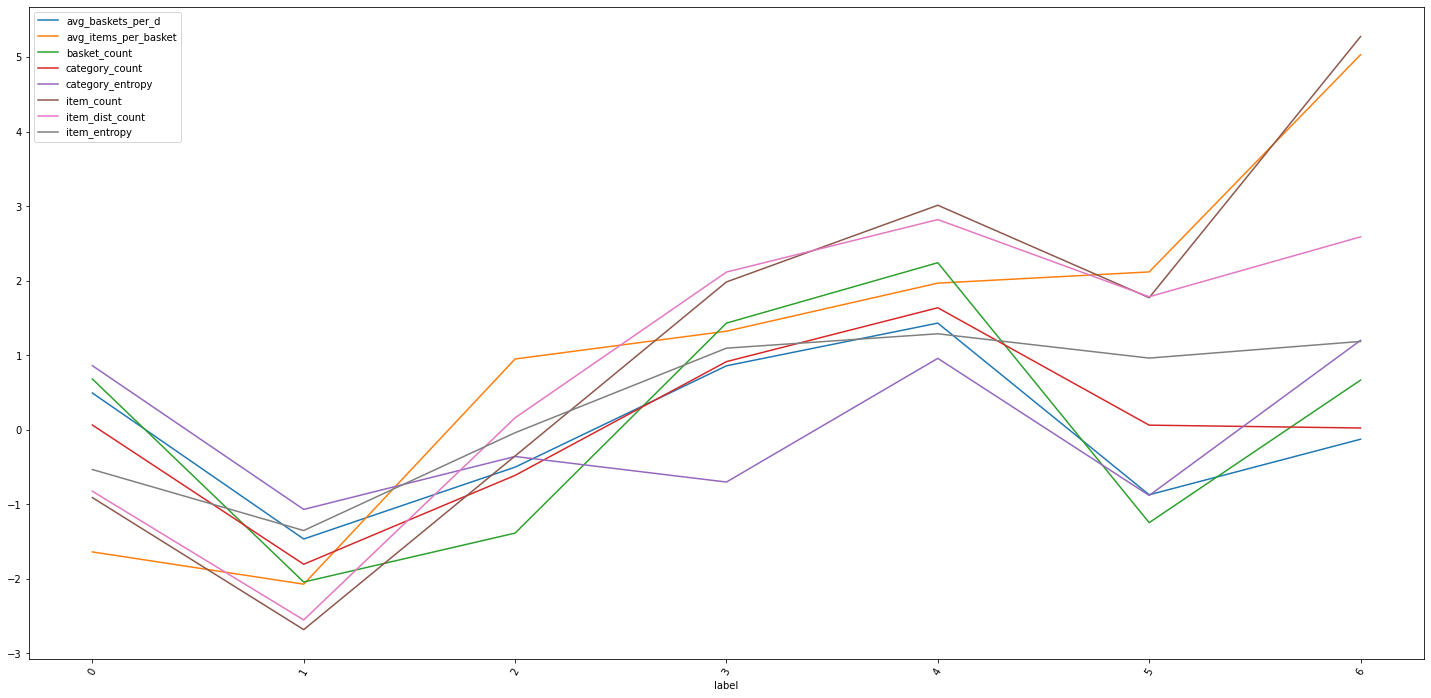

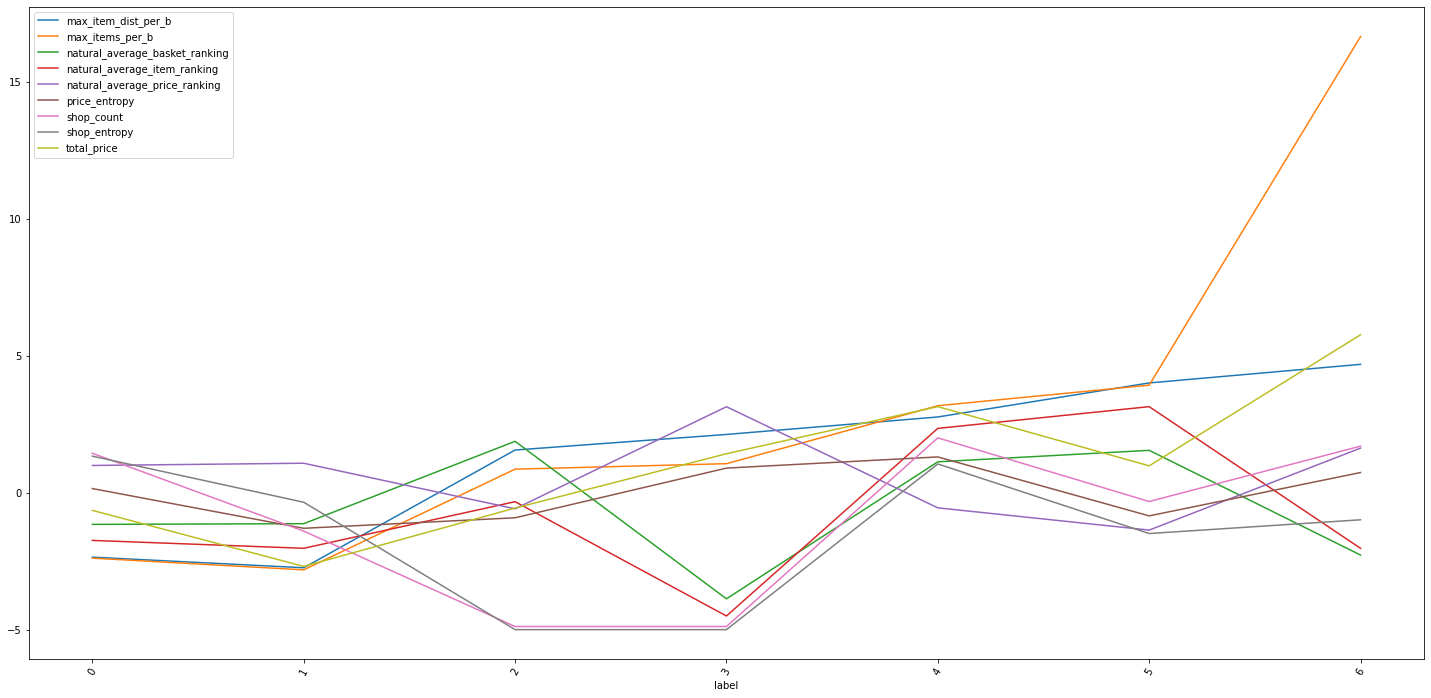

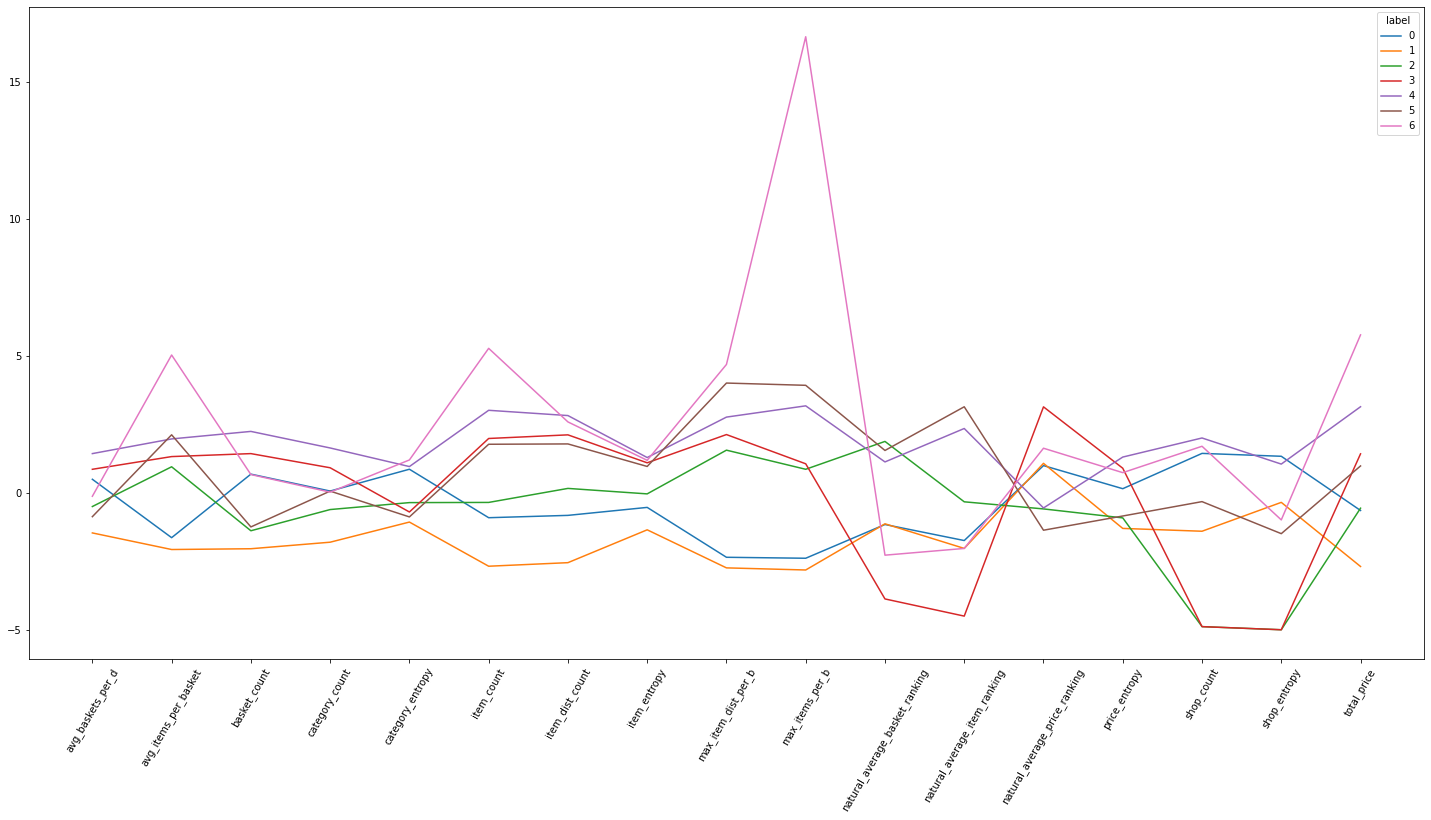

In [13]:
x_df = plot_expansion(u_df)

In [14]:
x_df

,avg_baskets_per_d,avg_items_per_basket,basket_count,category_count,category_entropy,item_count,item_dist_count,item_entropy,max_item_dist_per_b,max_items_per_b,natural_average_basket_ranking,natural_average_item_ranking,natural_average_price_ranking,price_entropy,shop_count,shop_entropy,total_price
label,,,,,,,,,,,,,,,,,
0,0.494947,-1.637301,0.682755,0.065046,0.861935,-0.908307,-0.823069,-0.531859,-2.353476,-2.388854,-1.156133,-1.742038,0.994928,0.151161,1.440516,1.335243,-0.644703
1,-1.464015,-2.069912,-2.041507,-1.802785,-1.067303,-2.680018,-2.550220,-1.350496,-2.740272,-2.817440,-1.130906,-2.029531,1.076929,-1.299472,-1.402385,-0.348058,-2.690049
2,-0.500049,0.951255,-1.384943,-0.610374,-0.356862,-0.350177,0.161741,-0.037981,1.558676,0.860111,1.877620,-0.327696,-0.587222,-0.915129,-4.885957,-5.000000,-0.560416
3,0.859688,1.323935,1.432536,0.915649,-0.699782,1.984852,2.117388,1.096566,2.128053,1.060621,-3.874693,-4.501823,3.139978,0.898675,-4.885957,-5.000000,1.423984
4,1.432851,1.968939,2.243227,1.638579,0.959728,3.014143,2.821891,1.289328,2.765772,3.176913,1.128627,2.349637,-0.552907,1.306501,2.003317,1.050042,3.144132
5,-0.870515,2.119451,-1.244795,0.063443,-0.879443,1.773796,1.786001,0.963373,4.009020,3.926745,1.547386,3.142708,-1.365018,-0.846142,-0.321077,-1.490664,0.982147
6,-0.125506,5.033685,0.667545,0.025313,1.201177,5.276683,2.590058,1.186922,4.687874,16.656580,-2.276431,-2.030559,1.628880,0.737336,1.701001,-0.988579,5.768223
